In [52]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt
from time import sleep
from IPython.display import clear_output

In [53]:
column = 50
row = 50
universe = np.zeros((column, row))
def build_cell(range_black_cell: int = column + 100) -> None:
    """ 
    jahan bazi ra misazad. be in sorat ke:
    be sorat random cell_array ra 1 midahad ta an cell baraye bazi faal shavad.
    """
    for _ in range(range_black_cell):
        i = randint(0, column - 1)
        j = randint(0, row - 1)
        universe[i, j] = 1
    return universe

In [54]:
def find_neighbours(cell_ind: tuple, universe) -> None:
    """ 
    be donbal hamsaye haye faal migardad yaani cell_array = 1
    """
    num_neighbours = 0
    L0 = universe.shape[0]
    L1 = universe.shape[1]

    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if (i != 0) or (j != 0):
                if cell_ind[0] + i == L0:
                    i = -cell_ind[0]
                if cell_ind[1] + j == L1:
                    j = -cell_ind[1]
                if universe[cell_ind[0] + i, cell_ind[1] + j] == 1:
                    num_neighbours += 1
    return num_neighbours

In [55]:
def pass_time(universe):
    """
    adress tamami hamsayeha ra pehda mikonad.
    va 3 ghaeede bazi barayash taarif shode ast.
    """
    num_neighbours_map = np.zeros(universe.shape)

    for i in range(universe.shape[0]):
        for j in range(universe.shape[1]):
            num_neighbours_map[i, j] = find_neighbours((i, j), universe)
            
    new_universe = np.zeros(universe.shape)
    survivors = (universe == 1) & ((num_neighbours_map == 2) | (num_neighbours_map == 3))
    zombie = (universe == 0) & (num_neighbours_map == 3)
    new_universe = ((survivors == 1) | (zombie == 1))

    return new_universe

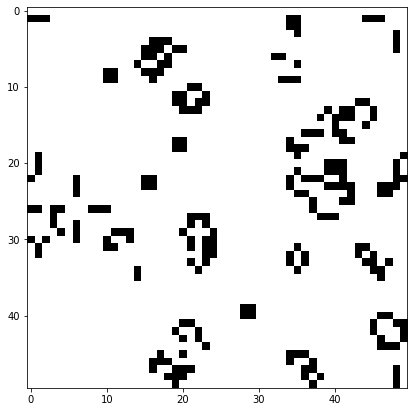

In [56]:
# adad vared shode dae parantez teedad cell = 1 mibashad
new_universe = build_cell(500)
# num_turns teedad dafaat run shodan barname hast
num_turns = 100

for _ in range(num_turns):
    new_universe = pass_time(new_universe)
    plt.figure(figsize=(7, 7))
    plt.imshow(new_universe, cmap='Greys')
    plt.show()
    sleep(0.1)
    clear_output(wait=True)